# **Métodos  de Verlet para ecuaciones diferenciales ordinarias de segundo orden**

El Método de Integración de Verlet es un métdo numérico utilizado para integrar ecuaciones diferenciales ordinarias de segundo orden con valores iniciales conocidos. Es apropiado en situaciones donde la expresión de la segunda derivada solo es función de las variables, dependiente o independiente, sin participar la primera derivada. Este método es utilizado frecuentemente para calcular trayectorias de partículas en dinámica molecular o problemas de dinámica newtoniana.  
En 1967, Verlet propuso el método y se basó en la expansión de Taylor. 
Suponga el siguiente problema de valor inicial (de segundo orden):


$$y''(x)=\color{red}{f(y)},\,\,\,\,\,\, y(0) = \alpha,\,\,\,\,\,\,y'(0) = \beta$$

Aproximando mediante una serie de Taylor centrada en $x_0$, tenemos

$$y(x_0)=\sum_{n=0}^{\infty}\frac{y^{(n)}(x_0)}{n!}(x-x_n)^n$$

de la misma manera para dos incrementos de la variable independiente:$\Delta x$ y $-\Delta x$, se obtiene

$$y(x_0+\Delta x)=\sum_{n=0}^{\infty}\frac{y^{(n)}(x_0)}{n!}(\Delta x)^n$$

$$y(x_0 - \Delta x)=\sum_{n=0}^{\infty}\frac{y^{(n)}(x_0)}{n!}(-\Delta x)^n$$



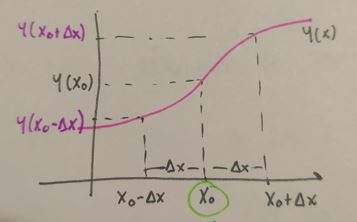

Las dos últimas ecuaciones pueden ser escritas como se muestra a continuación

$$
\begin{align}
y(x_0+\Delta x)&=y(x_0)+y'(x_0)\Delta x+\frac{y''(x_0)\Delta x^2}{2!}+\frac{y'''(x_0)\Delta x^3}{3!}+O(\Delta x^4)\\
y(x_0-\Delta x)&=y(x_0)-y'(x_0)\Delta x+\frac{y''(x_0)\Delta x^2}{2!}-\frac{y'''(x_0)\Delta x^3}{3!}+O(\Delta x^4)\\
\end{align}
$$

al sumar ambas expresiones, limitando la serie hasta el término de cuarto grado, y reagrupando términos se obtiene la ley de recursión para las posiciones

$$y(x_0+\Delta x) + y(x_0-\Delta x) = 2y(x_0) +y'' (x_0)(\Delta x)^2) + O(\Delta t^4)$$

despreciando el último término, el error cometido es de cuarto grado, inferior a la mayoría de los algoritmos convencionales. 

$$y(x_0+\Delta x) = 2y(x_0) + y(x_0-\Delta x) + y'' (x_0)(\Delta x)^2)$$

cambiando la representación por indices, tenemos 
$$y_{i+1} = 2y_i + y_{i-1} + y''_i(\Delta x)^2$$

$$\boxed{y_{i+1} = 2y_i + y_{i-1} + \color{red}{f(y_i)}(\Delta x)^2}$$

Como puede ver, la ecuación anterior proporciona la trayectoria sin intervenir la velocidad, lo que simplifica los cálculos. Sin embargo, para calcular la posición en cierto instante, sólo podrá hacerlo conociendo dos instantes anteriores.

El término $y_{i-1}$, se conoce también como *paso de arranque* y se puede obtener directamente desde la expansión de Taylor realizada con el incremento $-\Delta x$, así 

$$y(x_0-\Delta x)=y(x_0)-y'(x_0)\Delta x+\frac{y''(x_0)\Delta x^2}{2!}$$

cambiando la representación por indices, tenemos 


$$\boxed{y_{i-1}=y_0-y'_0\Delta x + \frac{1}{2}\color{red}{f(y_0)}(\Delta x)^2}$$

Los algoritmos de verlet en todas sus formas son reversibles en el tiempo, es decir si se cambian $t$ por $-t$, se recuperan las condiciones iniciales, esto es de gran importancia para el cálculo de la energía, los algoritmos de integración que conservan la energía se conocen como *métodos simplecticos*.

Para iniciar, resolveremos el siguiente problema de caída libre

$$y''=-g,\,\,\,\,\,\, y(0)=50,\,\,\,\,\,y'(0)=0$$

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
#Método de Verlet
def verlet(f, a, b, xf, n): #a = y(0) , b = y'(0)
    dx = xf/(n-1) #tamaño del paso,  n: número de iteraciones
    xs = np.arange(0, xf+dx, dx) 
    ys = np.zeros(np.size(xs)) 

    yinit = a - b*dx + 0.5*f(a)*dx**2 # paso de arranque

    ys[0] = yinit
    ys[1] = a
    for i in range(1,n-1):
        ys[i+1] = 2*ys[i] -ys[i-1] + f(ys[i])*dx**2
    return xs, ys

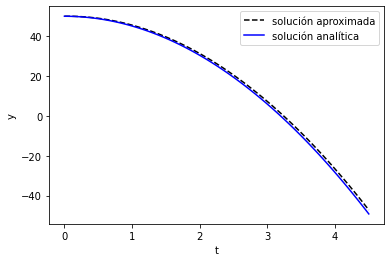

In [85]:
#Objeto cayendo desde una altura de 50 m
def f(y):
    return -9.8

tf = 4.5
t, y = verlet(f, 50.0, 0.0, tf, 100)

y_exacta = 50 -9.8/2.0*t**2

plt.plot(t, y,'k--',label = 'solución aproximada')
plt.plot(t, y_exacta,'b',label = 'solución analítica')
plt.xlabel ('t')
plt.ylabel ('y')
plt.legend()

##**Sistema planetario**
Supongamos que una partícula de masa $m$ (un planeta) es atraída por un cuerpo masivo de masa $M$ (el Sol). La partícula está sometida a una fuerza atractiva $F$ cuya dirección es radial y apuntando hacia el centro del Sol.  El módulo de la fuerza viene dado por la ley de Gravitación Universal,

$$F=-G\frac{mM}{r^2},$$

donde $G$ es la constante de gravitación universal. Siendo $r$ la distancia entre el planeta y el Sol, $r = \sqrt{x^2+y^2}$; por lo tanto, $x$ e $y$ son la posición del planeta respecto al sistema de referencia cuyo origen está situado en el Sol.

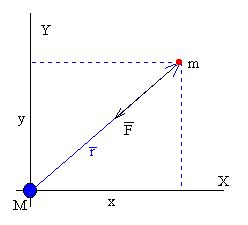

Las componentes de la fuerza son $\mathbf{F}=(f_x,f_y)$, 

$$
F_x = F\cos(\theta)=F\frac{x}{r},\\
F_y = F\sin(\theta)=F\frac{y}{r},\\
$$

Aplicando la segunda ley de Newton, y expresando la aceleración como la derivada segunda de la posición, tenemos un sistema de dos ecuaciones diferenciales de segundo orden.

$$
\mathbf{F} = m\mathbf{a}=m\frac{d^2\mathbf{r}}{dt^2},
$$


$$
\frac{d^2x}{dt^2} = -GM\frac{x}{r^3},\quad\text{y}\quad\frac{d^2y}{dt^2} = -GM\frac{y}{r^3}.
$$

Dadas las condiciones iniciales (posición y velocidad inicial), este sistema de dos ecuaciones diferenciales se puede resolver aplicando por ejemplo, el método de Verlet.

Para este caso, vamos a resolver numéricamente este sistema de ecuaciones para describir la órbita terrestre. Suponga que $x(0)=r_{Tierra}$, $x'(0)=0$ y $y(0)=0$, $y'(0)=\sqrt{\frac{GM}{r}}$. 

$GM=$ es conocido como el parámetro gravitacional y es proporcional a $\pi r^2$.


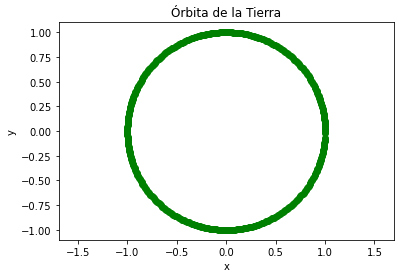

In [88]:
#Movimiento planetario

#Radio de los planetas en unidades astronómicas (UA):
rMer = 0.387                # Radio de Mercurio
rVen = 0.723                # Radio de Venus
rTie = 1.00                 # Radio de la Tierra
rMar = 1.524                # Radio de Marte
rJup = 5.203                # Radio de Jupiter
rSat = 9.537                # Radio de Saturno
rUra = 19.191               # Radio de Urano
rNep = 30.069               # Radio de Neptuno 

 
#Órbita para la Tierra

N = 365                   # Días que tarda la Tierra en dar una vuelta al Sol
dt = 1.00/N               # Tamaño del paso (h): Un día de la Tierra
mu = 4 * np.pi**2         # mu=4pi^2 es el parámetro gravitacional: mu = GM, donde G=6.67e-11 es la constante Gravitacional y M es la masa del cuerpo
rTie = 1.00               # Radio de la Tierra
tf = 360
    
t = np.arange(0, tf+dt, dt) 
x = np.zeros(len(t)) 
y = np.zeros(len(t)) 

#Condiciones iniciales
x0 = rTie     ## Para x
vx0 = 0

y0 = 0        ## Para y
vy0 = np.sqrt(mu/rTie) # Velocidad inicial en Vy0

xarranque = x0 - vx0*dt + 0.5*(-(mu*x0)/(rTie**3))*dt**2 # paso de arranque para x
yarranque = y0 - vy0*dt + 0.5*(-(mu*y0)/(rTie**3))*dt**2 # paso de arranque para y

x[0] = xarranque # x_{i-1}
x[1] = x0
y[0] = yarranque # y_{i-1}
y[1] = 0

for i in range(1,N-1):
  #x[i+1] = 2*x[i] - x[i-1] + f(x[i])*dt**2
  x[i+1] = 2*x[i] - x[i-1] + -(mu*x[i])/(rTie**3)*dt**2
  #y[i+1] = 2*y[i] - y[i-1] + f(y[i])*dt**2
  y[i+1] = 2*y[i] - y[i-1] + -(mu*y[i])/(rTie**3)*dt**2

plt.plot(x[0:N-2], y[0:N-2], 'go')
plt.title ('Órbita de la Tierra')
plt.xlabel ('x')
plt.ylabel ('y')
plt.axis('equal')
plt.show()
 

Investigue cuántos días tardan los otros planetas en dar una vuelta al sol, y grafique las trayectorias de cada uno de los planetas para tener una idea de nuestro sistema planetario. ✅

[1] Landau, R. H., Páez, M. J., & Bordeianu, C. C. (2015). Computational physics: Problem solving with Python. John Wiley & Sons.

[2] Pang, T. (1999). An introduction to computational physics.

